# Data Import and Library Loading

In [2]:
import pandas as pd
import glob
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr


In [5]:
data_src = "data/fids_reputation_20250508.csv"
neynar_src = "data/neynar_scores.csv"
dan_followers_src = "data/dan_farcaster_follows.csv"
botnet_followers_src = "data/casterbot_farcaster_follows.csv"

quotient = pd.read_csv(data_src)
quotient = quotient.drop_duplicates(subset='fid', keep='first')
quotient.set_index('row', inplace=True, verify_integrity=True)
neynar = pd.read_csv(neynar_src)
dan_followers = pd.read_csv(dan_followers_src)
casterbot_followers = pd.read_csv(botnet_followers_src)

quotient = quotient.merge(neynar, on='fid');

dan_follower_scores = quotient.merge(dan_followers, on='fid')
casterbot_follower_scores = quotient.merge(casterbot_followers, on='fid')

# Score Distribution Analysis

In [8]:
def histogram_plot(data, xlabel=None, ylabel=None, title=None):
    plt.figure()
    plt.hist(data, bins=50, log=True)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    plt.show()

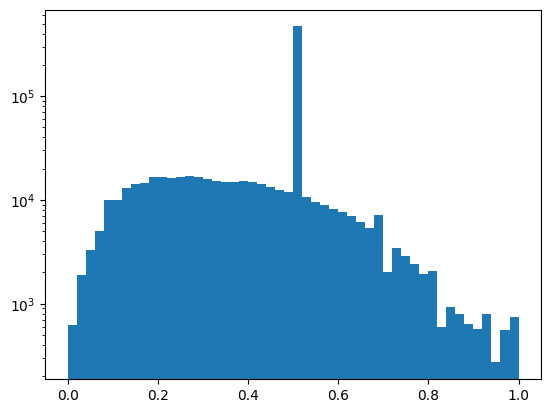

In [4]:
histogram_plot(quotient['neynar_score'])

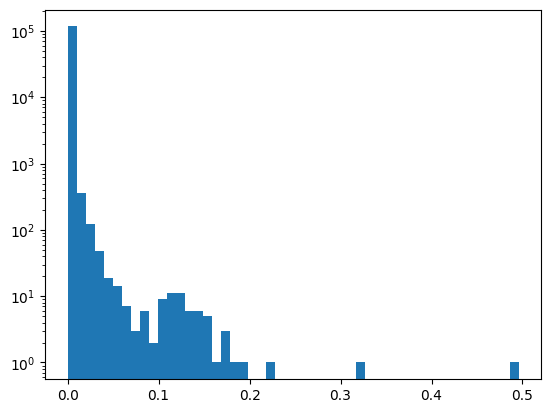

In [5]:
histogram_plot(quotient['cred_score'])

# Follower Score Analysis

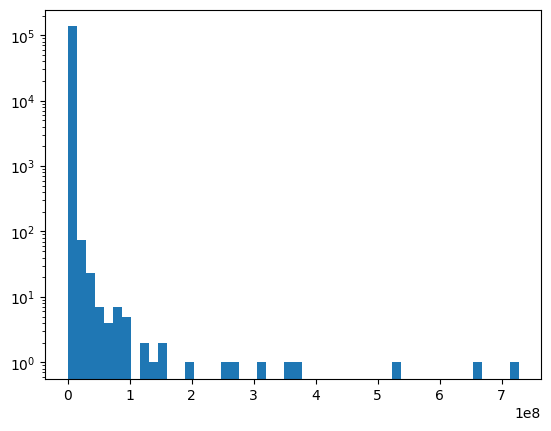

In [11]:
histogram_plot(quotient['bridge_score'])

# Bot Detection

In [16]:
quotient.query('fid == 3 | fid == 332281')

,fid,username,cred_score,cred_rank,bridge_score,bridge_rank,foo,neynar_score
10001,3,dwr.eth,0.495666,NaN,3.665881e+08,4.0,[],1.00
322276,332281,casterchain.eth,0.001602,NaN,0.000000e+00,91350.0,[],0.95


### Neynar Score Follower Distribution

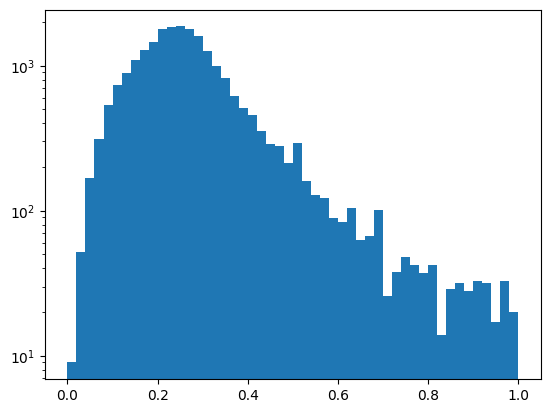

In [13]:
histogram_plot(casterbot_follower_scores['neynar_score'])

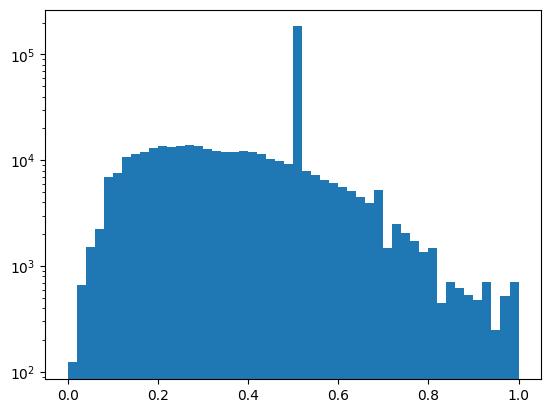

In [8]:
histogram_plot(dan_follower_scores['neynar_score'])

### Bridge Score

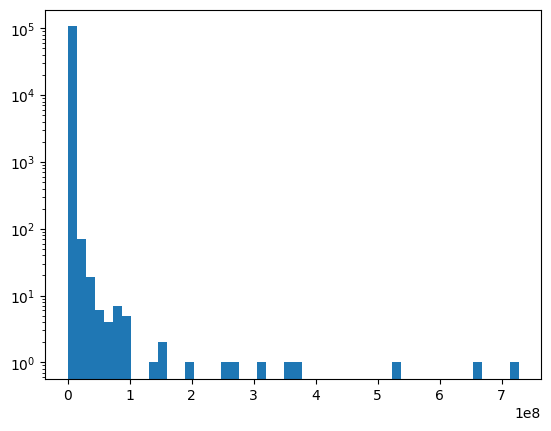

In [9]:
histogram_plot(dan_follower_scores['bridge_score'])

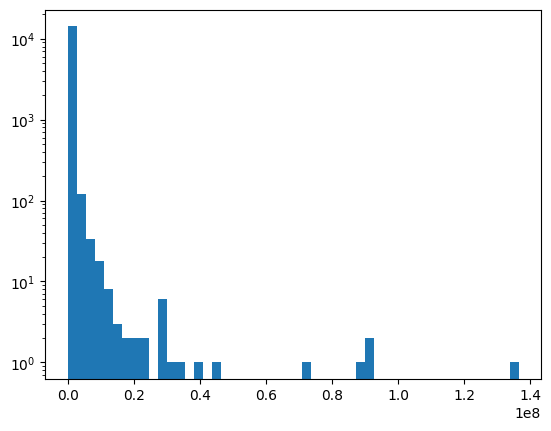

In [10]:
histogram_plot(casterbot_follower_scores['bridge_score'])

In [6]:
berachain = pd.read_csv("data/berachain-mentions.csv")
berachain_mention_scores = quotient.merge(berachain, on='fid')

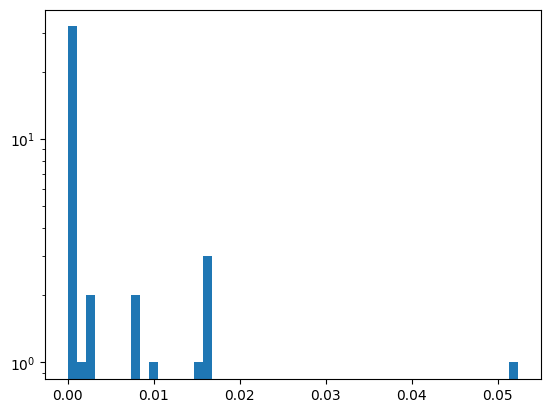

In [14]:
histogram_plot(berachain_mention_scores['cred_score'])

## Botnet Identification